![title](https://images.unsplash.com/photo-1634157703702-3c124b455499?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MzR8fG1vdmllfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=800&q=60)


# Microsoft Movie Studio Recommendations

**Author:** Stella Kitur

<b>Student pace:</b> Full time
***

## Overview

This project aims to primarily assist Microsoft in creating a new movie studio by analyzing various data to identify the most profitable movies, top-rated directors, and genres among others. 

The data analysis will involve statistical methods and data visualization to determine currently popular movie genres. The resulting insights will provide recommendations to the head of Microsoft's new movie studio on what types of films to produce, as well as an overview of potential competitors.

These recommendations will be based on empirical evidence and industry trends, enabling Microsoft to make informed decisions that increase the likelihood of their films being commercially successful.

## Business Problem

As Microsoft has taken note on other big companies enjoying success by creating original video content, they also want a slice of the pie.

However, the big question is how?

As a result, I have been tasked to study what films are doing the best in the box office as well as to provide other valuable insights before a decision is made.

The questions that were asked in analysing this data are:


        1. 
        2.
        3.
        4. 
These are relevant in answering the business problem at hand because as much as the profit made would be one of the key determinants of the success of the new movie studio, ensuring that the needs of the audience are met will ensure that Microsoft Movie Studio has an "edge" over the other studios through gaining a higher rating. This is made possible by identifying the top genres as well as directors.

## Data Understanding

The data we're working with in this project is based on publicly available movie datasets. Our aim is to answer questions related to movie ratings, box office performance, and profitability.
We're looking at movies that were released between 2010 and 2018 and gathering information such as ratings, budgets, and domestic and worldwide gross profits. Our target variable is the profitability of each movie.
Some of the properties of the variables we're working with include both categorical and numerical data types, and there are a few missing values that we'll need to address.

In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [4]:
# Here you run your code to explore the data

<b> Import Datasets </b>

The datasets that will be used are loaded. 

The datasets that are used in this project include:

                  1. Box Office Mojo Gross dataset
                  2. The Numbers Dataset
                  3. The IMDB dataset

In [5]:
#Load the datafiles in csv format first.
bom_movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
numbers_data = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [6]:
bom_movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
numbers_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
conn = sqlite3.connect('zippedData/im.db')
imdb_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [9]:
imdb = pd.read_sql("""
    SELECT mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, 
           mb.genres, mr.averagerating, mr.numvotes, d.person_id, p.primary_name
    FROM movie_basics mb
    JOIN movie_ratings mr ON mr.movie_id = mb.movie_id
    JOIN directors d ON d.movie_id = mb.movie_id
    JOIN persons p ON p.person_id = d.person_id
""", conn)

imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul


In [10]:
imdb.shape
print(f" This tells us that there are {imdb.shape} columns in this dataset")


 This tells us that there are (181387, 9) columns in this dataset


In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    181387 non-null  object 
 1   original_title   181387 non-null  object 
 2   start_year       181387 non-null  int64  
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
 6   numvotes         181387 non-null  int64  
 7   person_id        181387 non-null  object 
 8   primary_name     181387 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.5+ MB


In [12]:
# Summary statistics of this dataframe
pd.options.display.float_format = '{:.2f}'.format
imdb.describe()


,start_year,runtime_minutes,averagerating,numvotes
count,181387.00,163584.00,181387.00,181387.00
mean,2014.31,97.79,6.22,4955.52
std,2.54,194.43,1.39,37609.31
min,2010.00,3.00,1.00,5.00
25%,2012.00,84.00,5.40,19.00
50%,2014.00,94.00,6.30,66.00
75%,2016.00,107.00,7.20,311.00
max,2019.00,51420.00,10.00,1841066.00


## Data Preparation

To get the data ready for analysis, I started by dropping columns that weren't relevant to my research questions and merging data from different sources. Next, I looked for missing values and outliers in the data. For missing values, I used imputation techniques to fill in the gaps, while for outliers, I used both visualizations and statistical methods to identify and address them. I believe these choices were appropriate given the nature of the data and my research questions, as they allowed me to conduct a thorough and accurate analysis while keeping the most relevant variables.

In [14]:
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


It is noted that in the <i>foreign_gross</i> column, it is in the datatype object.

Therefore, we will define a function that will change it to a float instead.


In [15]:
# create a function that will change foreign_gross into a float

def to_float(df,column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df
to_float(bom_movies_gross, 'foreign_gross')
bom_movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,nan,2018
3383,Edward II (2018 re-release),FM,4800.00,nan,2018
3384,El Pacto,Sony,2500.00,nan,2018
3385,The Swan,Synergetic,2400.00,nan,2018


As there are missing values in the <i> domestic_gross and foreign_gross </i> columns, we will fill the values with 0.

In [16]:
# Next we will fill in the missing values in domestic_gross and foreign_gross
bom_movies_gross['domestic_gross'].fillna(0, inplace = True) 
bom_movies_gross['foreign_gross'].fillna(0, inplace= True)
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


For the missing data in the <i>studio</i> column will be dropped.

In [17]:
bom_movies_gross.dropna(subset=['studio'],inplace=True)
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


<b>2. The Numbers Dataset</b>

In [18]:
numbers_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [1]:
"""
In the columns production_budget, domestic_gross and worldwide_gross, there are commas and $
which will interfere with the analysis process.
So we will run a code that will drop the commas and the $.
"""

'\nIn the columns production_budget, domestic_gross and worldwide_gross, there are commas and $\nwhich will interfere with the analysis process.\nSo we will run a code that will drop the commas and the $.\n'

In [20]:
numbers_data['production_budget']= pd.to_numeric(numbers_data.production_budget.str.replace('[^\d.]',''))

In [21]:
numbers_data['domestic_gross']= pd.to_numeric(numbers_data.domestic_gross.str.replace('[^\d.]',''))

In [22]:
numbers_data['worldwide_gross'] = pd.to_numeric(numbers_data.worldwide_gross.str.replace('[^\d.]',''))

In [23]:
numbers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [24]:
numbers_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [25]:
# The datatype has been successfully changed to what was desired.

In [26]:
# Creating a new column called domestic profits

numbers_data['domestic_profits']= numbers_data['domestic_gross'] - numbers_data['production_budget']
numbers_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [27]:
# Creating a new column called worldwide profits

numbers_data['worldwide_profits']= numbers_data['worldwide_gross'] - numbers_data['production_budget']
numbers_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1400


In [28]:
numbers_data.sort_values(by='domestic_profits', ascending=False, inplace=True)
numbers_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,459363944,2008208395
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,449998007,775598007
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864
...,...,...,...,...,...,...,...,...
31,32,"May 18, 2012",Battleship,220000000,65233400,313477717,-154766600,93477717
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
12,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-185697885,-14997885
13,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,-201941321,7778100


This will enable us to create a barchart in the next section <b> Data Modeling </b>

<b>3. The Movie_Basics and Movie_Ratings tables </b>

Here we extract data from the <i>movie_basics and movie_ratings</i> table from the IMDB database. 

In [29]:
#Load movie basics table
movie_basics_df = pd.read_sql("""
    SELECT *
        FROM movie_basics AS mb
        """,conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [30]:
#Inspect the data in the data frame to identify necessary steps needed to be taken. 
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [31]:
missing_values = movie_basics_df[['runtime_minutes', 'genres']].isnull().sum()

print(missing_values)
print("""
This shows the total of missing values in these two columns.
""")

runtime_minutes    31739
genres              5408
dtype: int64

This shows the total of missing values in these two columns.



 Due to the large amount of missing values in the runtime_minutes we will drop it
 
 And for the genres we will just replace the missing values so that it is it's own category

In [32]:
movie_basics_df.dropna(subset=['runtime_minutes'], inplace=True)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama


In [33]:
movie_basics_df['genres'] = movie_basics_df['genres'].fillna('Unknown')
movie_basics_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama


In [34]:
# Drop duplicates from movie_id
movie_basics_df.drop_duplicates(subset=['movie_id'], inplace= True)

In [35]:
movie_basics_df.isnull().sum()


movie_id           0
primary_title      0
original_title     4
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [36]:
#Identify the movies that are duplicates in original_title column

missing_original_title = movie_basics_df[movie_basics_df['original_title'].isnull()]
print(missing_original_title)

         movie_id                           primary_title original_title  \
39095   tt2397619              Woody Allen: A Documentary           None   
58624   tt3414266                          The Outer Loop           None   
115983  tt6882442  Hirugao: Love Affairs in the Afternoon           None   
116350  tt6911842                              Senioritus           None   

        start_year  runtime_minutes   genres  
39095         2012           195.00  Unknown  
58624         2013            78.00  Unknown  
115983        2017           125.00  Romance  
116350        2017            75.00  Unknown  


In [37]:
# Replaces "None" in the original_title column with the value in the primary_title
mask = movie_basics_df['original_title'].isna()
movie_basics_df.loc[mask, 'original_title'] = movie_basics_df.loc[mask, 'primary_title']
print(movie_basics_df)


         movie_id                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0066787                    One Day Before the Rainy Season   
2       tt0069049                         The Other Side of the Wind   
4       tt0100275                           The Wandering Soap Opera   
5       tt0111414                                        A Thin Life   
...           ...                                                ...   
146135  tt9916170                                      The Rehearsal   
146136  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
146137  tt9916190                                          Safeguard   
146139  tt9916538                                Kuambil Lagi Hatiku   
146142  tt9916730                                             6 Gunn   

                                           original_title  start_year  \
0                                               Sunghursh     

In [38]:
# check if the value in the original_title column was successfully replaced for a specific primary_title
primary_title = 'Woody Allen: A Documentary'
original_title = movie_basics_df.loc[movie_basics_df['primary_title'] == primary_title, 'original_title'].values[0]
print(original_title)

Woody Allen: A Documentary


In [39]:
movie_basics_df.drop_duplicates()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama


In [40]:
# Load movie_ratings table
movie_ratings_df = pd.read_sql("""
    SELECT *
    FROM movie_ratings AS mr
    """, conn)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [41]:
#Inspect the data in the data frame to identify necessary steps needed to be taken. 
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [42]:
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


No further actions were taken in this dataframe.

## Data Visualization and Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***



The questions asked were: <b>
1. What were the top 5 rated studios? 
2. What are the top rated genres?
3. What were the most profitable movies?
4. Who were the top rated directors? </b>

<i> <b> Top Studios </b> </i>


In order to determine the top 5 rated studios in the industry, the following code was run in order to group together the studio as well as the gross income received.

In [43]:
# Group by studio and sum the values to get the total gross income so far per studio 
studio_list = bom_movies_gross.loc[:,
         ["studio","domestic_gross","foreign_gross"]].groupby("studio").sum()

In [44]:
# sort the top studios by foreign gross and display only the top 5 studios
studio_list.sort_values(by="foreign_gross",ascending=False, inplace=True)
top_studios = studio_list.iloc[:5]
top_studios.reset_index(inplace = True)
top_studios


,studio,domestic_gross,foreign_gross
0,BV,18419029199.00,25793852199.00
1,Fox,10949499997.00,20055866599.00
2,WB,12168046000.00,18667902998.00
3,Uni.,12902393000.00,16854767999.00
4,Sony,8459683098.00,13945354998.00


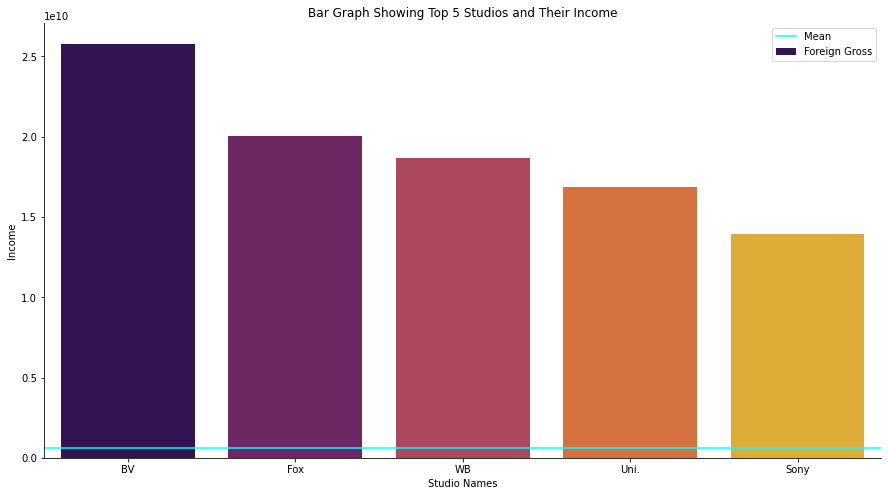

In [45]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=top_studios, x='studio', y='foreign_gross', palette='inferno', label='Foreign Gross')
ax.axhline(y=studio_list['foreign_gross'].mean(), color='cyan', label='Mean')

# set the x and y labels and title
plt.xlabel('Studio Names')
plt.ylabel('Income')
plt.title('Bar Graph Showing Top 5 Studios and Their Income')

# show the legend
ax.legend(loc="upper right")

# remove the top and right spines
sns.despine()
plt.show()


In [46]:
# Here you run your code to model the data


As illustrated in the barchart above, the top 5 best rated studios include:

1. BV (Buena Vista)
2. Fox
3. WB (Warner Brothers)
4. Universal Studios and
5. Sony

This is necessary in regards to the business problem as it highlights the competition that Microsoft Studios would be up against.

<i> <b> Top rated Genres </b> </i>


In order to determine the top rated genres in the industry, the genres were grouped together based on their average rating. 

In [47]:
genre_ratings = imdb.groupby('genres')['averagerating'].mean().reset_index()
genre_ratings


,genres,averagerating
0,Action,5.75
1,"Action,Adult,Comedy",4.65
2,"Action,Adventure",5.31
3,"Action,Adventure,Animation",6.32
4,"Action,Adventure,Biography",7.16
...,...,...
916,Thriller,5.64
917,"Thriller,War",5.43
918,"Thriller,Western",6.75
919,War,6.24


In [48]:
top_genres = genre_ratings.sort_values('averagerating', ascending=False).head(5)
top_genres

,genres,averagerating
449,"Comedy,Documentary,Fantasy",9.40
849,"History,Sport",9.20
880,"Music,Mystery",9.00
835,Game-Show,9.00
715,"Drama,Fantasy,War",8.80


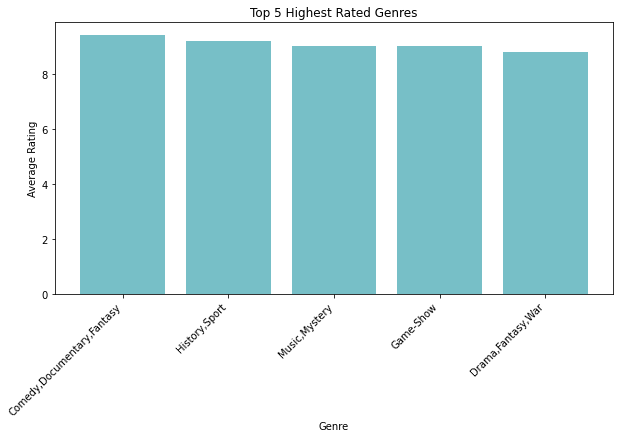

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(top_genres['genres'], top_genres['averagerating'], color='#77BFC7')

# set x and y axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('Top 5 Highest Rated Genres')

# rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# show plot
plt.show()

Based on the barchart illustrated, the top rated genres include :

    1. Comedy, Documentary, Fantasy
    2. History, Sport
    3. Music, Mystery 
    4. Game shows
    5. Drama, Fantasy, War

This gives us an overview of what types of films are well rated in the box office.

Furthermore, using this data we wanted to explore what are the 5 lowest rated genres, this was in order to be able to determine what the audience also does not enjoy.

In [50]:
# Find the lowest rated genres
lowest_genres = genre_ratings.sort_values('averagerating', ascending=False).tail(5)
lowest_genres

,genres,averagerating
219,"Adventure,Drama,Musical",2.33
848,"History,Sci-Fi,Thriller",2.30
195,"Adventure,Crime,Romance",2.30
153,"Adult,Horror",2.00
527,"Comedy,Musical,Sport",1.40


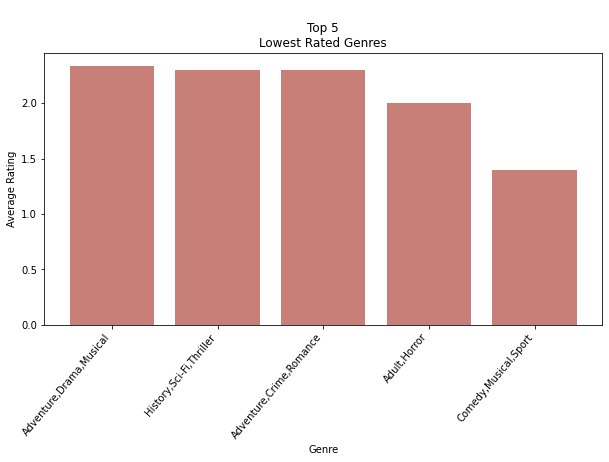

In [51]:
#Create the barplot

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(lowest_genres['genres'], lowest_genres['averagerating'], color='#C77F77')

# set x and y axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('''
Top 5
Lowest Rated Genres''')

# rotate x-axis labels to avoid overlapping
plt.xticks(rotation=50, ha='right')

# show plot
plt.show()

The lowest rated genres are displayed in the bar chart above, this highlights that the audience are likely to give a lower rating on films that belong to the following genres:

1. Adventure, Drama, Musical
2. History, Sci-Fi, Thriller
3. Adventure, Crime, Romance
4. Adult, Horror
5. Comedy, Musical, Sport

<i> <b> Profitable Movies </b> </i>


Next, the dataset The Numbers were used in order to explore the top 5 most profitable movies.

In [52]:
top_5_movies = numbers_data.head(5)
top_5_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,459363944,2008208395
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,449998007,775598007
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864


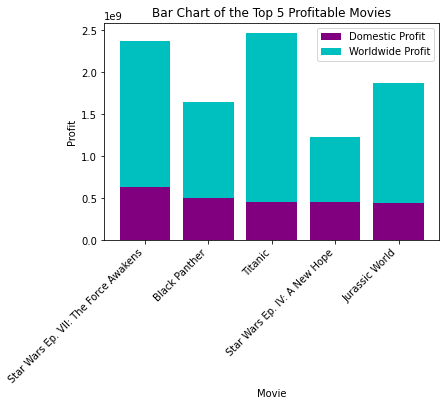

In [53]:
plt.bar(top_5_movies['movie'], top_5_movies['domestic_profits'], color ='purple')
plt.bar(top_5_movies['movie'], top_5_movies['worldwide_profits'], bottom=top_5_movies['domestic_profits'], color ='c')

# Add labels and title to the plot
plt.xlabel('Movie')
plt.ylabel('Profit')
plt.title('Bar Chart of the Top 5 Profitable Movies')
plt.legend(labels=['Domestic Profit', 'Worldwide Profit'])
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()

As shown in the above barchart, it is worth mentioning that in comparison to<i> domestic_profits, worldwide_profits </i> were significantly higher.

<i> <b>  The Top Rated Directors </b></i>

Finally, in order to find out who the top directors are, the data for the directors was grouped together with the average rating.
Then, the new dataframe was cleaned to drop any duplicate values and then sorted through to retrieve the top 5 directors.

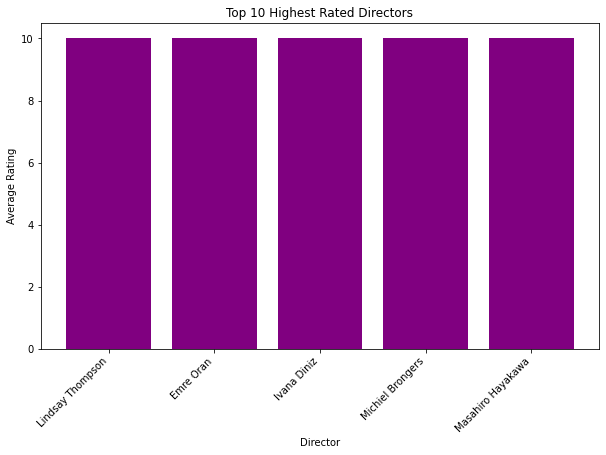

In [54]:
# calculate average rating by director
director_ratings = imdb.groupby('primary_name')['averagerating'].mean().reset_index()

# drop duplicates
director_ratings.drop_duplicates(subset='primary_name', keep='first', inplace=True)

# sort by rating in descending order and extract the top 10 highest rated directors
top_directors = director_ratings.sort_values('averagerating', ascending=False).head(5)

# create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_directors['primary_name'], top_directors['averagerating'], color='purple')

# set x and y axis labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Average Rating')
ax.set_title('Top 10 Highest Rated Directors')

# rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# show plot
plt.show()


In [55]:
top_directors

,primary_name,averagerating
31252,Lindsay Thompson,10.00
15370,Emre Oran,10.00
21566,Ivana Diniz,10.00
36721,Michiel Brongers,10.00
34538,Masahiro Hayakawa,10.00


As noted by the barchart and displayed in the table above, the following directors are the most top rated directors as they all have an average rating of 10.00

## Recommendations

<b> Recommendation 1: Focus on the Top Rated Genres</b>

Due to there being higher ratings on those types of films, Microsoft should consider focusing on those genres to ensure customer satisfaction, if that is one of their goals.

<b> Recommendation 2: Focus on the Foreign/Worldwide audience </b>

According to the analysis done regarding the profits, the highest profits generated was due to worldwide profits.

Therefore, where the focus is on increasing profits more emphasis should be placed on a global audience rather than only reaching the domestic audience.


<b> Recommendation 3: Try and work with the top rated directors </b>

Thirdly, based on the analysis, I would recommend that Microsoft considers directing movies with those that have a higher rating due to the quality of work that is produced by them.


<b> Recommendation 4: Study the competition further</b>

While we have identified the other top studios based on income, it would be necessary to further explore why they are at the top.

Therefore, I suggest further analysis is done as based on the SWOT method, it can highlight potential threats to Microsoft's latest venture or expose opportunities that they can use for their success.



## Conclusions

In conclusion, through the use of the datasets The Numbers, Box office Mojo and the IMDB database, an exploratory data analysis has allowed to a certain extent answer the business problem.

However, there are limitations to this analysis, which include:

1. <b> Causation does not mean correlarion </b>

As the saying goes, "Causation is not correlation ", so while there may be higher ratings for certain variable such as genres, it may not only be the only factor leading to this result and therefore further analysis would be needed to provide a more accurate result.


2. <b> Accuracy </b>

The lack of using all the datasets provided as well as how to use them effectively is a limitation to the results provided which may therefore influence the accuracy of the results returned.

<b> Future Improvements: </b>


One area of improvement would be to complete a SWOT Analysis based on the findings as this would be beneficial to Microsoft and help in the decision making process.

Additionally, I would improve on the way data is explored, for example to find out what the Return of Investment (RoI) would be for this scenario.